In [1]:
import numpy as np 
import matplotlib.pyplot as plt

### METHOD 1 (Using normal distribution Z-score)

In [27]:
dataset = [11, 10, 12, 14, 13, 15, 14, 12, 14, 17, 19, 107, 10
           , 13, 12, 14, 17, 19, 107, 10, 13, 12, 14, 12, 108,
           12, 11, 14, 13, 15, 12, 10, 14, 15, 10]

(array([32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

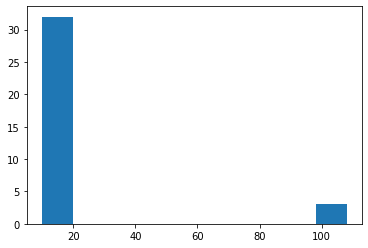

In [28]:
plt.hist(dataset)

In [44]:
# using Z-score to find the outlier
outliers = []
def detect_outliers(data):
    threshold = 3 # 3rd standard deviatoin 
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [46]:
detect_outliers(dataset)

[107, 107, 108, 107, 107, 108]

### METHOD 2 (Using IQR)

1) Sort the data 
2) Calculate the Q1(25%) Q3(75%)
3) IQR -> Q3 - Q1
4) Finding the lower fence (Q1 - 1.5(IQR))
5) Finding the upper fence (Q3 + 1.5(IQR))

data points the lie below the lower fence or higher than the upper fence are considered as outliers 

In [49]:
dataset = sorted(dataset)

In [66]:
Q1,Q3 = np.percentile(dataset,[25,75])
IQR = Q3 - Q1

# LOWER FENCE 
lowerFence = Q1 - 1.5*IQR
# UPPER FENCE 
upperFence = Q3 + 1.5*IQR
print(lowerFence,upperFence)

7.5 19.5


In [74]:
outLiers = []
# Range takes value in int
for i in dataset:
    if i not in range(int(lowerFence),int(upperFence)):
        outLiers.append(i)
print(outLiers)

[19, 19, 107, 107, 108]


### METHOD 3 (Usign Box Plot for visulalization) 

In [76]:
import seaborn as sns

D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

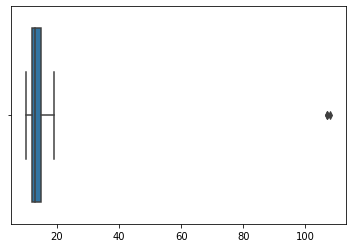

In [78]:
sns.boxplot(dataset)